# Simple Attitude

In [1]:
import sys

In [2]:
for _ in range(2):
    try:
        import jdrones        
    except ModuleNotFoundError:
        print("jdrones not found, installing")
        !{sys.executable} -m pip install -q git+ssh://git@github.com/iwishiwasaneagle/jdrones/

In [3]:
import gymnasium
import jdrones

import pandas as pd
import numpy as np

from tqdm.auto import tqdm

In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

/home/jhewers/.local/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
from collections import deque

In [6]:
T = 20
dt = 1/240
seed = 1337

In [7]:
env = gymnasium.make("AttitudeAltitudeDroneEnv-v0",dt=dt)
env = gymnasium.wrappers.TimeLimit(env, max_episode_steps=int(T/dt))

b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
base_link

pybullet build time: Feb  2 2023 13:13:41


In [8]:
observations = deque()

obs, info = env.reset(seed=seed)
setpoint = env.action_space.sample()
trunc, term = False, False
for _ in tqdm(range(int(T/dt)-1)):
    obs, _, term, trunc, info = env.step(setpoint)
    observations.append(obs)

  0%|          | 0/4799 [00:00<?, ?it/s]

In [9]:
data = np.array(observations)
t = np.linspace(0,len(data)*dt,len(data))
df = pd.DataFrame(data,columns=["x","y","z","qx","qy","qz","qw","phi","theta","psi","vx","vy","vz","p","q","r","P0","P1","P2","P3"],index=t)
df.index.name = 't'
df

,x,y,z,qx,qy,qz,qw,phi,theta,psi,vx,vy,vz,p,q,r,P0,P1,P2,P3
t,,,,,,,,,,,,,,,,,,,,
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,412.020000,412.020000,412.020000,412.020000
0.004168,0.000000,0.000000,0.002691,0.000000,0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.645825,0.000000,0.000000,0.000000,412.020000,412.020000,412.020000,412.020000
0.008335,0.000000,0.000000,0.008072,0.000000,0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,1.291473,0.000000,0.000000,0.000000,412.020000,412.020000,412.020000,412.020000
0.012503,0.000000,0.000000,0.016142,0.000000,0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,1.936805,0.000000,0.000000,0.000000,412.020000,412.020000,412.020000,412.020000
0.016670,0.000000,0.000000,0.026899,0.000000,0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,2.581682,0.000000,0.000000,0.000000,412.020000,412.020000,412.020000,412.020000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19.979163,43.116015,50.712618,3.073505,-0.025207,0.039622,0.336787,0.940409,-0.020810,0.091627,0.686841,2.528141,3.413798,-0.187209,0.009031,-0.007726,-0.002819,101.015659,93.985001,91.124051,99.434671
19.983331,43.126578,50.726879,3.073222,-0.025194,0.039599,0.336782,0.940412,-0.020802,0.091577,0.686831,2.535177,3.422719,-0.067979,0.009132,-0.008166,-0.002523,177.057710,173.178256,171.691270,176.210318
19.987498,43.137202,50.741218,3.073975,-0.025182,0.039576,0.336778,0.940415,-0.020794,0.091526,0.686822,2.549693,3.441273,0.180813,0.009183,-0.008408,-0.002374,0.000000,0.000000,0.000000,0.000000


In [10]:
df_long = df.melt(var_name='variable', value_name='value',ignore_index=False).reset_index()
df_long

,t,variable,value
0,0.000000,x,0.000000
1,0.004168,x,0.000000
2,0.008335,x,0.000000
3,0.012503,x,0.000000
4,0.016670,x,0.000000
...,...,...,...
95975,19.979163,P3,99.434671
95976,19.983331,P3,176.210318
95977,19.987498,P3,0.000000
95978,19.991666,P3,0.000000


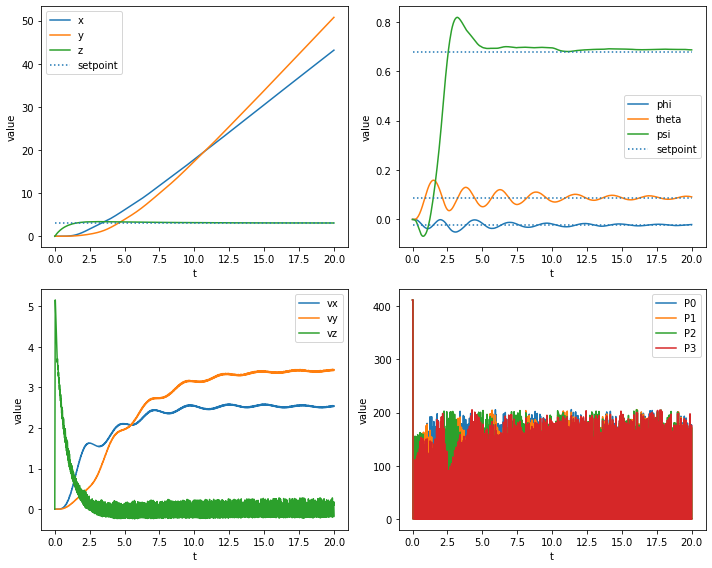

In [11]:
fig, ax = plt.subplots(2,2,figsize=(10,8))
ax = ax.flatten()

sns.lineplot(data=df_long.query("variable in ('x','y','z')"), x='t',y='value',hue='variable',ax=ax[0])
ax[0].hlines(setpoint[3],df.index.min(),df.index.max(),linestyles='dotted',label="setpoint")
ax[0].legend()

sns.lineplot(data=df_long.query("variable in ('phi','theta','psi')"), x='t',y='value',hue='variable',ax=ax[1])
ax[1].hlines(setpoint[:3],df.index.min(),df.index.max(),linestyles='dotted',label="setpoint")
ax[1].legend()

sns.lineplot(data=df_long.query("variable in ('vx','vy','vz')"), x='t',y='value',hue='variable',ax=ax[2])
ax[2].legend()

sns.lineplot(data=df_long.query("variable in ('P0','P1','P2','P3')"), x='t',y='value',hue='variable',ax=ax[3])
ax[3].legend()

fig.tight_layout()

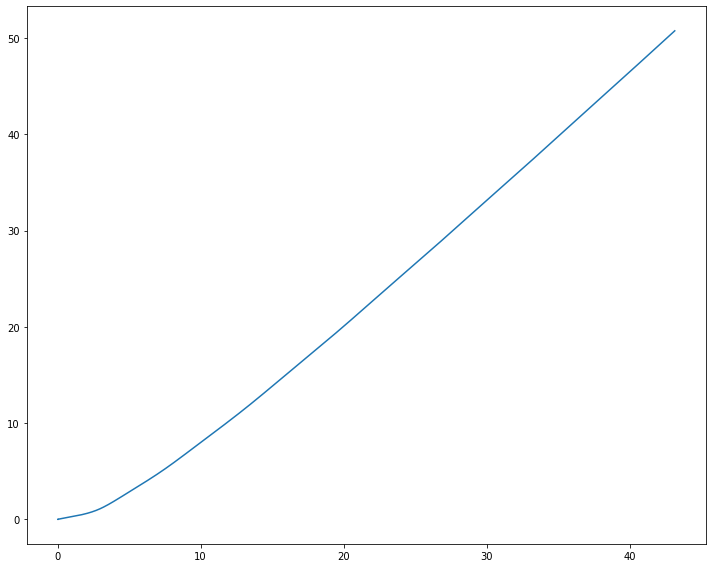

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

ax.plot(df.x,df.y)

fig.tight_layout()